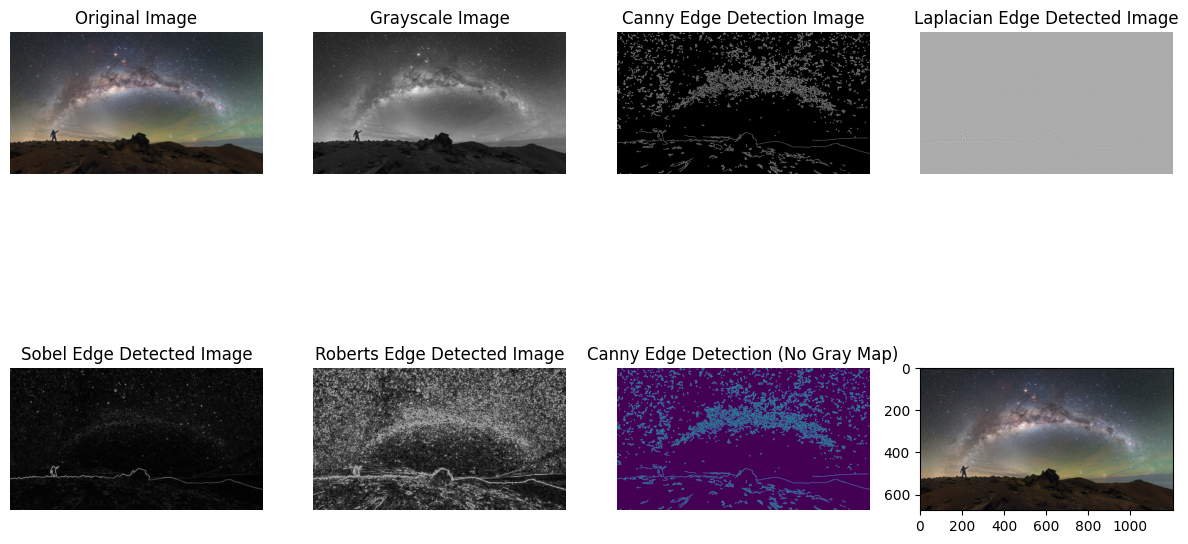

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Load the image
image_path = "/content/Edge-Detection.jpg"
original_image = cv2.imread(image_path)

# Check if the image was loaded successfully
if original_image is None:
    print(f"Error: Unable to load image at {image_path}.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    canny = cv2.Canny(gray_image, threshold1=30, threshold2=100)

    # Apply the Laplacian edge detector
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

    # Compute Sobel gradients in both X and Y directions
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the gradients to get the magnitude
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Initialize Roberts cross operator masks
    roberts_cross_v = np.array([[1, 0], [0, -1]])
    roberts_cross_h = np.array([[0, 1], [-1, 0]])

    # Calculate vertical and horizontal gradients using Roberts Cross operator
    vertical = ndimage.convolve(gray_image, roberts_cross_v)
    horizontal = ndimage.convolve(gray_image, roberts_cross_h)

    # Calculate gradient magnitude for Roberts operator
    roberts = np.sqrt(np.square(horizontal) + np.square(vertical))

    # Display the Original image, grayscale image, and edge-detected images
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 4, 2)
    plt.imshow(gray_image, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(2, 4, 3)
    plt.imshow(canny, cmap="gray")
    plt.title("Canny Edge Detection Image")
    plt.axis("off")

    plt.subplot(2, 4, 4)
    plt.imshow(laplacian, cmap="gray")
    plt.title("Laplacian Edge Detected Image")
    plt.axis("off")

    plt.subplot(2, 4, 5)
    plt.imshow(sobel_magnitude, cmap="gray")
    plt.title("Sobel Edge Detected Image")
    plt.axis("off")

    plt.subplot(2, 4, 6)
    plt.imshow(roberts, cmap="gray")
    plt.title("Roberts Edge Detected Image")
    plt.axis("off")

    plt.subplot(2, 4, 7)
    plt.imshow(canny)
    plt.title("Canny Edge Detection (No Gray Map)")
    plt.axis("off")

    plt.subplot(2, 4, 8)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))